<a href="https://colab.research.google.com/github/nakul05/projects/blob/main/Dogs_vs_cats_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install kaggle

In [2]:
! mkdir ~/.kaggle


In [3]:
! cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [4]:
! chmod 600 ~/.kaggle/kaggle.json


chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [5]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:50<00:00, 18.9MB/s]
100% 1.06G/1.06G [00:50<00:00, 22.6MB/s]


In [6]:

import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

#
Dog vs Cat Classifier


In [7]:
#building cnn model

import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [8]:
#generators:(divide data into batches) usefull in processing large datasets

train_ds= keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels ='inferred', #Specifies how the labels are provided. If set to 'inferred', Keras will infer the class labels from the subdirectory names.
    label_mode ='int',
    batch_size = 32,
    image_size =(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels ='inferred', #Specifies how the labels are provided. If set to 'inferred', Keras will infer the class labels from the subdirectory names.
    label_mode ='int',
    batch_size = 32,
    image_size =(256,256)
)




Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [9]:
#NORMALISING VALUES: (MAKES IN RANGE BETWEEN 0 AND 1)
def process(image, label):
    image = tf.cast(image / 255., tf.float32)
    return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [10]:
# creating cnn model

model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding = 'valid',activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding = 'valid',activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 128)     36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 128)       0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 492032)            0         
                                                                 
 dense (Dense)               (None, 128)               6

In [12]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics = ['accuracy'])

In [13]:
history=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 71s 102ms/step - loss: 0.6448 - accuracy: 0.6564 - val_loss: 0.5256 - val_accuracy: 0.7484
Epoch 2/10
625/625 [==============================] - 65s 103ms/step - loss: 0.4617 - accuracy: 0.7775 - val_loss: 0.4950 - val_accuracy: 0.7762
Epoch 3/10
625/625 [==============================] - 65s 103ms/step - loss: 0.2643 - accuracy: 0.8889 - val_loss: 0.7443 - val_accuracy: 0.7556
Epoch 4/10
625/625 [==============================] - 65s 104ms/step - loss: 0.1230 - accuracy: 0.9534 - val_loss: 1.0948 - val_accuracy: 0.7526
Epoch 5/10
625/625 [==============================] - 63s 101ms/step - loss: 0.0756 - accuracy: 0.9776 - val_loss: 1.2231 - val_accuracy: 0.7390
Epoch 6/10
625/625 [==============================] - 65s 103ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 1.1971 - val_accuracy: 0.7438
Epoch 7/10
625/625 [==============================] - 61s 98ms/step - loss: 0.0322 - accuracy: 0.9912 - val_loss: 1.3829 - val_acc

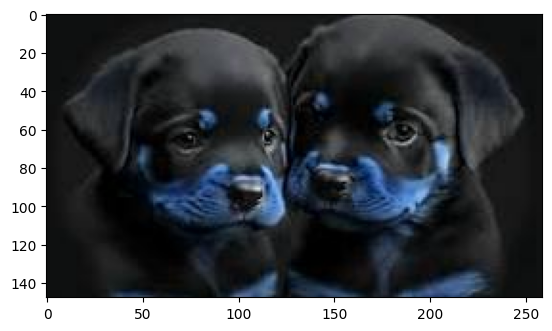

In [15]:
import cv2
import matplotlib.pyplot as plt
test_img = cv2.imread('/content/download.jpg')
plt.imshow(test_img)

In [16]:
test_img.shape

(148, 259, 3)

In [17]:
test_img = cv2.resize(test_img,(256,256))

In [18]:
test_input = test_img.reshape((1,256,256,3))

In [19]:
model.predict(test_input)

1/1 [==============================] - 0s 373ms/step


array([[1.]], dtype=float32)